In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, select_scl5
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

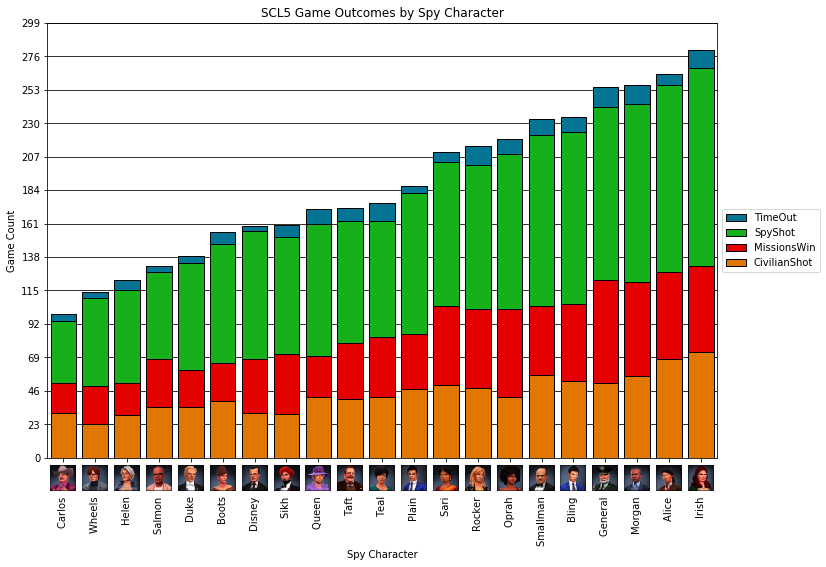

DataPlotProperties(frame=                      Carlos  Wheels  Helen  Salmon  Duke  Boots  Disney  \
WinType.TimeOut            5       4      7       4     5      8       3   
WinType.SpyShot           43      61     64      60    74     82      88   
WinType.MissionsWin       20      26     22      33    25     26      37   
WinType.CivilianShot      31      23     29      35    35     39      31   

                      Sikh  Queen  Taft  ...  Plain  Sari  Rocker  Oprah  \
WinType.TimeOut          8     10     9  ...      5     7      13     10   
WinType.SpyShot         81     91    84  ...     97    99      99    107   
WinType.MissionsWin     41     28    39  ...     38    54      54     60   
WinType.CivilianShot    30     42    40  ...     47    50      48     42   

                      Smallman  Bling  General  Morgan  Alice  Irish  
WinType.TimeOut             11     10       14      13      8     12  
WinType.SpyShot            118    118      119     122    128    136  


In [5]:
game_outcomes(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Spy Character",
        savefig='example_pictures/scl5_spy_selection.png'
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sum,
    )
)

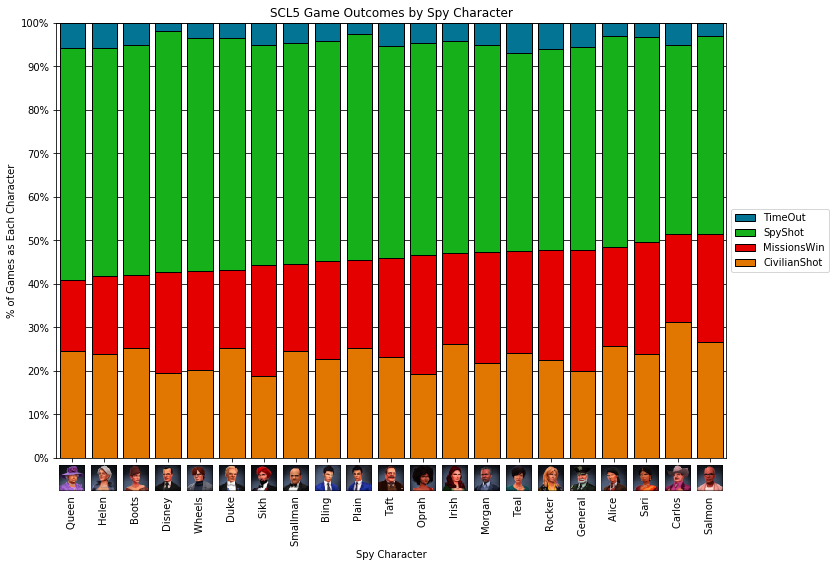

DataPlotProperties(frame=                         Queen     Helen     Boots    Disney    Wheels  \
WinType.TimeOut       0.058480  0.057377  0.051613  0.018868  0.035088   
WinType.SpyShot       0.532164  0.524590  0.529032  0.553459  0.535088   
WinType.MissionsWin   0.163743  0.180328  0.167742  0.232704  0.228070   
WinType.CivilianShot  0.245614  0.237705  0.251613  0.194969  0.201754   

                          Duke     Sikh  Smallman     Bling     Plain  ...  \
WinType.TimeOut       0.035971  0.05000  0.047210  0.042735  0.026738  ...   
WinType.SpyShot       0.532374  0.50625  0.506438  0.504274  0.518717  ...   
WinType.MissionsWin   0.179856  0.25625  0.201717  0.226496  0.203209  ...   
WinType.CivilianShot  0.251799  0.18750  0.244635  0.226496  0.251337  ...   

                         Oprah     Irish    Morgan      Teal    Rocker  \
WinType.TimeOut       0.045662  0.042857  0.050781  0.068571  0.060748   
WinType.SpyShot       0.488584  0.485714  0.476562  0.457143  0.4

In [6]:
game_outcomes(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

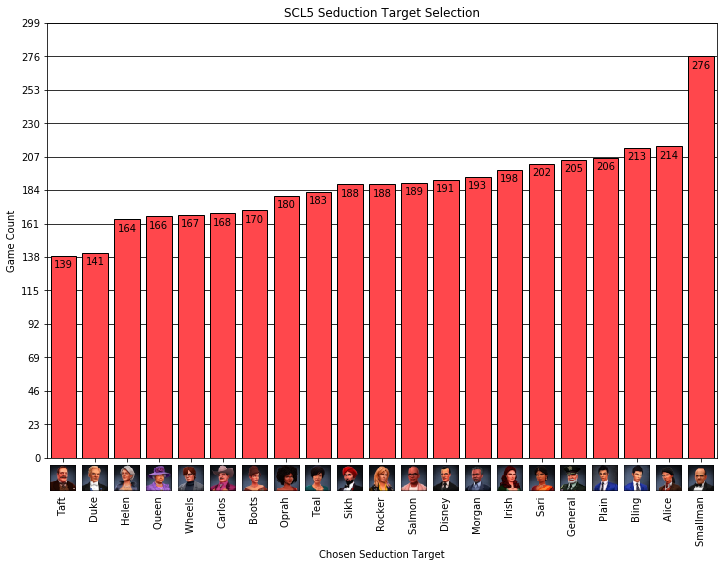

DataPlotProperties(frame=     Taft  Duke  Helen  Queen  Wheels  Carlos  Boots  Oprah  Teal  Sikh  ...  \
NaN   139   141    164    166     167     168    170    180   183   188  ...   

     Salmon  Disney  Morgan  Irish  Sari  General  Plain  Bling  Alice  \
NaN     189     191     193    198   202      205    206    213    214   

     Smallman  
NaN       276  

[1 rows x 21 columns], stacks_are_categories=True)

In [7]:
st_selection(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Seduction Target Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

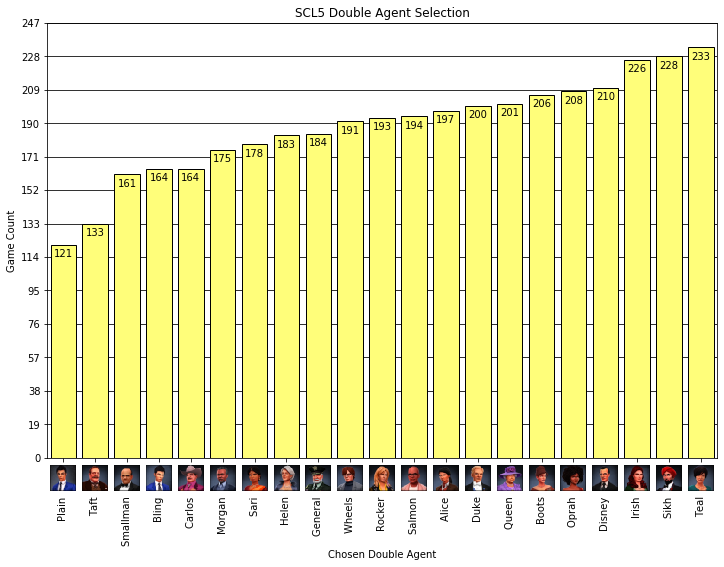

DataPlotProperties(frame=     Plain  Taft  Smallman  Bling  Carlos  Morgan  Sari  Helen  General  \
NaN    121   133       161    164     164     175   178    183      184   

     Wheels  ...  Salmon  Alice  Duke  Queen  Boots  Oprah  Disney  Irish  \
NaN     191  ...     194    197   200    201    206    208     210    226   

     Sikh  Teal  
NaN   228   233  

[1 rows x 21 columns], stacks_are_categories=True)

In [8]:
double_agent_selection(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Double Agent Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Double Agent",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

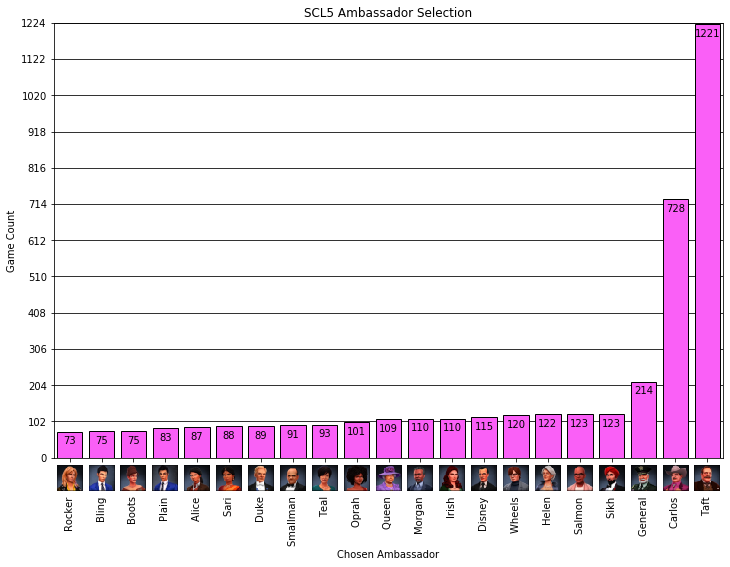

DataPlotProperties(frame=     Rocker  Bling  Boots  Plain  Alice  Sari  Duke  Smallman  Teal  Oprah  \
NaN      73     75     75     83     87    88    89        91    93    101   

     ...  Morgan  Irish  Disney  Wheels  Helen  Salmon  Sikh  General  Carlos  \
NaN  ...     110    110     115     120    122     123   123      214     728   

     Taft  
NaN  1221  

[1 rows x 21 columns], stacks_are_categories=True)

In [9]:
amba_selection(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)